# The following notebook explores a common machine learning workflow by assessing survival potential aboard individuals on the Titanic. Data from: https://www.kaggle.com/competitions/titanic/data

In [42]:
## importing dataset
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

survival = pd.read_csv('/Users/mjs/Downloads/titanic/gender_submission.csv')
test = pd.read_csv('/Users/mjs/Downloads/titanic/test.csv')
train = pd.read_csv('/Users/mjs/Downloads/titanic/train.csv')

In [43]:
## explore data. according to the kaggle data, this is simply an example of what the final output should look like.
survival.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [153]:
## explore training data
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,1,22.0,1,0,A/5 21171,7.2500,3.296,S
1,2,1,1,Cumings,2,38.0,1,0,PC 17599,71.2833,3.000,C
2,3,1,3,Heikkinen,2,26.0,0,0,STON/O2. 3101282,7.9250,3.296,S
3,4,1,1,Futrelle,2,35.0,1,0,113803,53.1000,3.000,S
4,5,0,3,Allen,1,35.0,0,0,373450,8.0500,3.296,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila,1,27.0,0,0,211536,13.0000,3.296,S
887,888,1,1,Graham,2,19.0,0,0,112053,30.0000,2.000,S
888,889,0,3,Johnston,2,29.0,1,2,W./C. 6607,23.4500,3.296,S
889,890,1,1,Behr,1,26.0,0,0,111369,30.0000,3.000,C


In [154]:
## explore test data
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Kelly,1,34.5,0,0,330911,7.8292,3.255,Q
1,893,3,Wilkes,2,47.0,1,0,363272,7.0000,3.255,S
2,894,2,Myles,1,62.0,0,0,240276,9.6875,3.255,Q
3,895,3,Wirz,1,27.0,0,0,315154,8.6625,3.255,S
4,896,3,Hirvonen,2,22.0,1,1,3101298,12.2875,3.255,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,Spector,1,30.0,0,0,A.5. 3236,8.0500,3.255,S
414,1306,1,Oliva y Ocana,2,39.0,0,0,PC 17758,108.9000,3.000,C
415,1307,3,Saether,1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,3.255,S
416,1308,3,Ware,1,30.0,0,0,359309,8.0500,3.255,S


### the data doesn't require this, but I'm going to clean a bit, just for peace of mind. ideally, can clean then T/T/S, but going to clean train data and test data separately

In [46]:
## first, only taking the last name of all of the passengers
names = []
for i in train['Name']:
    name = i.split(',')
    i = name[0]
    names.append(i)

train['Name'] = names
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
names = []
for i in test['Name']:
    name = i.split(',')
    i = name[0]
    names.append(i)

test['Name'] = names
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Kelly,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Wilkes,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Myles,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Wirz,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Hirvonen,female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
## now, getting dummies for sex. avoiding pd.get_dummies, 
## since the dataset isn't huge and i'm practicing iterating in a df.

sex = []
for i in train['Sex']:
    if i == 'male':
        sex.append(1)
    else:
        sex.append(2)
train['Sex'] = sex
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,2,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,2,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,1,35.0,0,0,373450,8.0500,NaN,S


In [122]:
sex = []
for i in test['Sex']:
    if i == 'male':
        sex.append(1)
    else:
        sex.append(2)
test['Sex'] = sex
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Kelly,1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Wilkes,2,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Myles,1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Wirz,1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Hirvonen,2,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
## Cabin structure seems to be something to look at. Since it's hard to quantify, I'm going to
## look at deck structure. Deck 'A' was higher than decks 'B,' 'C,' etc. Those at the top of 
## the boat might have had a higher survival rate. Let's see.

cabin_str = []
for i in train['Cabin']:
    j = str(i)
    cabin_str.append(j)

In [123]:
cabin_str_test = []
for i in test['Cabin']:
    j = str(i)
    cabin_str_test.append(j)

In [124]:
## change to sring type
for i in test['Cabin']:
    test['Cabin'] = cabin_str_test

In [125]:
## for calculating average cabin type
cabin_test = []
for i in test['Cabin']:
    if i[0] == 'A':
        cabin_test.append(1)
    elif i[0] == 'B':
         cabin_test.append(2)
    elif i[0] == 'C':
        cabin_test.append(3)
    elif i[0] == 'D':
        cabin_test.append(4)
    elif i[0] == 'E':
        cabin_test.append(5)
    elif i[0] == 'F':
        cabin_test.append(6)

In [71]:
## i want to consider as many entries as possible. therefore, i'll just add a mean for all of those individuals
## for whom there's no cabin information for. it will affect the results slightly, but i'll still get 
## some directionality.
import numpy as np
print(np.mean(cabin))

3.2964824120603016


In [126]:
import numpy as np
print(np.mean(cabin_test))

3.2555555555555555


In [76]:
## finalize a list of values to represent cabin type
new_cabin = []
for i in train['Cabin']:
    if i == 'nan':
        new_cabin.append(3.296)
    elif i[0] == 'A':
        new_cabin.append(1)
    elif i[0] == 'B':
         new_cabin.append(2)
    elif i[0] == 'C':
        new_cabin.append(3)
    elif i[0] == 'D':
        new_cabin.append(4)
    elif i[0] == 'E':
        new_cabin.append(5)
    elif i[0] == 'F':
        new_cabin.append(6)
    else:
        new_cabin.append(3.296)

In [127]:
new_cabin_test = []
for i in test['Cabin']:
    if i == 'nan':
        new_cabin_test.append(3.255)
    elif i[0] == 'A':
        new_cabin_test.append(1)
    elif i[0] == 'B':
         new_cabin_test.append(2)
    elif i[0] == 'C':
        new_cabin_test.append(3)
    elif i[0] == 'D':
        new_cabin_test.append(4)
    elif i[0] == 'E':
        new_cabin_test.append(5)
    elif i[0] == 'F':
        new_cabin_test.append(6)
    else:
        new_cabin_test.append(3.296)

In [77]:
## apply new values to column
for i in train['Cabin']:
    train['Cabin'] = new_cabin

In [128]:
for i in test['Cabin']:
    test['Cabin'] = new_cabin_test

In [129]:
print(np.mean(test['Age']))

30.272590361445783


In [84]:
print(np.mean(train['Age']))

29.69911764705882


In [109]:
age = []
for i in train['Age']:
    if np.isnan(i) == True:
        age.append(29.0)
    else:
        age.append(i)

In [130]:
age_test = []
for i in test['Age']:
    if np.isnan(i) == True:
        age_test.append(30.0)
    else:
        age_test.append(i)

In [114]:
for i in train['Age']:
    train['Age'] = age

In [131]:
for i in test['Age']:
    test['Age'] = age_test

In [115]:
## view output. lower cabin values imply being higher up on the ship, age NaN replaced with average as well.
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,1,22.0,1,0,A/5 21171,7.2500,3.296,S
1,2,1,1,Cumings,2,38.0,1,0,PC 17599,71.2833,3.000,C
2,3,1,3,Heikkinen,2,26.0,0,0,STON/O2. 3101282,7.9250,3.296,S
3,4,1,1,Futrelle,2,35.0,1,0,113803,53.1000,3.000,S
4,5,0,3,Allen,1,35.0,0,0,373450,8.0500,3.296,S


In [132]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Kelly,1,34.5,0,0,330911,7.8292,3.255,Q
1,893,3,Wilkes,2,47.0,1,0,363272,7.0000,3.255,S
2,894,2,Myles,1,62.0,0,0,240276,9.6875,3.255,Q
3,895,3,Wirz,1,27.0,0,0,315154,8.6625,3.255,S
4,896,3,Hirvonen,2,22.0,1,1,3101298,12.2875,3.255,S


In [180]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

features = ['PassengerId', "Pclass", "Sex", "Age", "SibSp", "Parch", "Cabin"]
X = train[features]
X_test = test[features]

In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=1)

In [186]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': predictions})

In [187]:
output.head(15)

,PassengerId,Survived
862,863,1
223,224,0
84,85,1
680,681,1
535,536,1
623,624,0
148,149,0
3,4,1
34,35,0
241,242,1


In [188]:
output['Survived'].value_counts()

0    149
1     74
Name: Survived, dtype: int64

Looks like 74 people out of our 268 person test set would survive based off of our training data! Let's dig a little deeper to understand model performance and which features are most important.

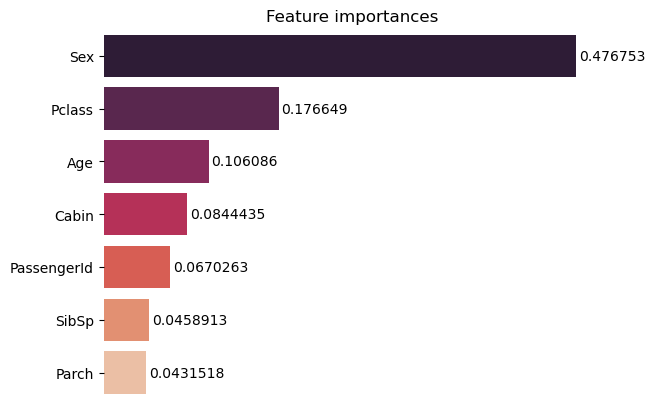

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

## obtain features
features_df = pd.DataFrame({'features': model.feature_names_in_, 'importances': model.feature_importances_ })

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

In [193]:
## for accuracy

# Create confusion matrix
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
confusion_matrix(y_test, predictions)

# Display accuracy score
print(accuracy_score(y_test, predictions))

# Display F1 score
print(f1_score(y_test, predictions))

0.8430493273542601
0.7928994082840236


Not a bad score! Passengers on the titanic had an actual 32% survival rate, and the calculated survival rate reflects that. What if I tried with a different supervised learning model?

In [194]:
from sklearn.linear_model import LogisticRegression # Logistic Regression

model2 = LogisticRegression()
model2.fit(X_train, y_train)
prediction_lr = model2.predict(X_test)

In [195]:
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))

The accuracy of the Logistic Regression is 81.17


In [197]:
from sklearn.svm import SVC, LinearSVC

model3 = SVC()
model3.fit(X_train, y_train)
prediction_svm = model3.predict(X_test)

In [198]:
print('The accuracy of the Support Vector Machines Classifier is',round(accuracy_score(prediction_svm, y_test)*100,2))

The accuracy of the Support Vector Machines Classifier is 57.4


In [201]:
from sklearn.neighbors import KNeighborsClassifier

model4 = KNeighborsClassifier(n_neighbors = 4)
model4.fit(X_train, y_train)
prediction_knn = model4.predict(X_test)

In [202]:
print('The accuracy of the K Nearst Neighbors Classifier is',round(accuracy_score(prediction_knn,y_test)*100,2))

The accuracy of the K Nearst Neighbors Classifier is 54.71


In [203]:
from sklearn.ensemble import GradientBoostingClassifier

model5 = GradientBoostingClassifier()
model5.fit(X_train, y_train)
prediction_gbc = model5.predict(X_test)

In [204]:
print('The accuracy of the Gradient Boosting Classifier is',round(accuracy_score(prediction_gbc,y_test)*100,2))

The accuracy of the Gradient Boosting Classifier is 80.27


### Looks like our original RVC model is best!